# Is there a correlation between good hitting catchers and wins?
#### Rafi Kigner and Josh Leeman

## Imports

In [333]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

## Data Processing - Setup

#### We first compiled data of cumulative catchers' statistics from all 30 MLB teams and put it into a JSON file using Google Firebase. 
#### For each MLB team we listed their win totals and catchers' batting average, on-base percentage, and slugging percentage.

#### We then imported the JSON file into our .ipynb file in order to convert it to a CSV file.


In [334]:
with open('catchersToWins.json') as json_file:
    data = json.load(json_file)
    print(data)
catchers_stats = data[' Team_Catchers_Cumulative_Stats_To_Wins']

{' Team_Catchers_Cumulative_Stats_To_Wins': [{'Name': 'Giants', '0BP': 360, 'BA': 271, 'SLG': 446, 'Wins': 107}, {'Name': 'Reds', 'OBP': 352, 'BA': 260, 'SLG': 400, 'Wins': 83}, {'Name': 'Red Sox', 'OBP': 319, 'BA': 266, 'SLG': 365, 'Wins': 92}, {'Name': 'Royals', 'OBP': 310, 'BA': 264, 'SLG': 496, 'Wins': 74}, {'Name': 'Nationals', 'OBP': 352, 'BA': 260, 'SLG': 416, 'Wins': 65}, {'Name': 'Brewers', 'OBP': 327, 'BA': 244, 'SLG': 421, 'Wins': 95}, {'Name': 'Dodgers', 'OBP': 343, 'BA': 243, 'SLG': 448, 'Wins': 106}, {'Name': 'Phillies', 'OBP': 312, 'BA': 236, 'SLG': 383, 'Wins': 82}, {'Name': 'Diamond Backs', 'OBP': 324, 'BA': 236, 'SLG': 410, 'Wins': 52}, {'Name': 'Rays', 'OBP': 309, 'BA': 234, 'SLG': 494, 'Wins': 100}, {'Name': 'Cardinals', 'OBP': 293, 'BA': 233, 'SLG': 339, 'Wins': 90}, {'Name': 'Blue Jays', 'OBP': 305, 'BA': 233, 'SLG': 403, 'Wins': 91}, {'Name': 'Padres', 'OBP': 310, 'BA': 231, 'SLG': 327, 'Wins': 79}, {'Name': 'Tigers', 'OBP': 282, 'BA': 226, 'SLG': 451, 'Wins': 77

## Data Processing - Convert from JSON to CSV to Dataframe

#### After converting from the JSON to CSV, we made a dataframe consisting off all 30 MLB teams and their respective cumulative statistics for all their catchers.

In [335]:
catchers_stats = data[' Team_Catchers_Cumulative_Stats_To_Wins']
data_file = open('/Users/joshleeman/src/Tamid-TechEdu-S22/Final/catchersToWins.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(catchers_stats[0].keys())
for catcher in catchers_stats:
    csv_writer.writerow(catcher.values())
data_file.close()
df = pd.read_csv('catchersToWins.csv')
df

,Name,0BP,BA,SLG,Wins
0,Giants,360,271,446,107
1,Reds,352,260,400,83
2,Red Sox,319,266,365,92
3,Royals,310,264,496,74
4,Nationals,352,260,416,65
5,Brewers,327,244,421,95
6,Dodgers,343,243,448,106
7,Phillies,312,236,383,82
8,Diamond Backs,324,236,410,52
9,Rays,309,234,494,100


## Data Integration

#### Once we had our dataframe, we needed to clean and alter our dataframe to have only what we wanted to draw a conclusion.

#### We began with combining the SLG and OBP columns from the dataframe to form another stat called OPS and removed the BA column because we weren't going to use it. 

#### We then made two additional dataframes, one consisting of teams with at least 85 wins and the other consisting of all other teams.

In [336]:
df['OPS'] = df['0BP'] + df['SLG']
df.drop('BA', axis=1, inplace=True)
df = df[["Name", "0BP", "SLG", "OPS", "Wins"]]
good_teams = df.loc[df['Wins'] >= 85]
good_teams

,Name,0BP,SLG,OPS,Wins
0,Giants,360,446,806,107
2,Red Sox,319,365,684,92
5,Brewers,327,421,748,95
6,Dodgers,343,448,791,106
9,Rays,309,494,803,100
10,Cardinals,293,339,632,90
11,Blue Jays,305,403,708,91
18,White Sox,365,434,799,93
21,Athletics,288,387,675,86
23,Mariners,285,370,655,90


In [337]:
bad_teams = df.loc[df['Wins'] < 85]
bad_teams

,Name,0BP,SLG,OPS,Wins
1,Reds,352,400,752,83
3,Royals,310,496,806,74
4,Nationals,352,416,768,65
7,Phillies,312,383,695,82
8,Diamond Backs,324,410,734,52
12,Padres,310,327,637,79
13,Tigers,282,451,733,77
14,Angels,298,366,664,77
15,Orioles,285,344,629,52
16,Rockies,303,438,741,74


## Data Visualization

#### We then created three graphs. One being a scatterplot with a line of best fit between all of the team's OPS and total wins.

#### The other two graphs are each boxplots relating a team's catcher OPS to total wins.


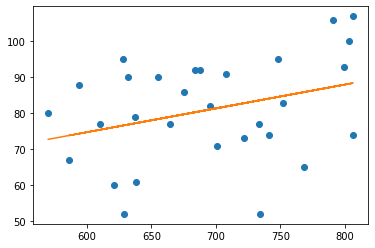

In [338]:
OPS = 'OPS'
Wins = 'Wins'
plt.plot(OPS, Wins, data = df, linestyle = 'none', marker = 'o')
m, b = np.polyfit(df[OPS], df[Wins], 1)
plt.plot(df[OPS], m * df[OPS] + b)

#### We can see that there is a positive correlation between catcher OPS and Wins.

<AxesSubplot:ylabel='OPS'>

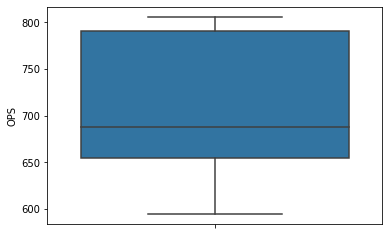

In [339]:
sns.boxplot(y=good_teams['OPS'])

#### This is a boxplot of all the good teams catchers' OPS. As you can see, the average OPS is near 700, however the majority of teams are above that average meaning there a few outliers bringing that average down. Now let's compare it to the average catcher OPS of the bad teams.

<AxesSubplot:ylabel='OPS'>

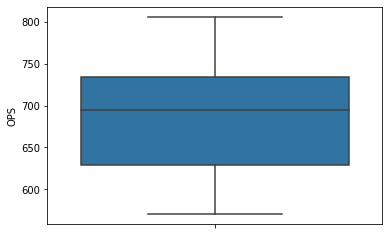

In [340]:
sns.boxplot(y=bad_teams['OPS'])

#### We see that the average is almost identical, however in this case, there are outliers bringing the average up. The scatterplot told us that there is a positive correlation between team catcher OPS and team wins but the boxplots say that the average amongst good and bad teams are similar. Let us use an OLS regression to prove our point that there is a positive correlation between team catcher OPS and team wins.

## Data Validation

#### Our null hypothesis is that the average rate of change between cumulative team catchers OPS and total team wins is 0. Our alternate hypothesis is that the average rate of change between cumulative team catchers OPS and total team wins is not 0 and has an increasing slope.

In [341]:
x = df[['OPS']]
y = df[['Wins']]
regression = sm.OLS(x, y)
results = regression.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    OPS   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              985.2
Date:                Sat, 23 Apr 2022   Prob (F-statistic):                    6.15e-24
Time:                        12:16:08   Log-Likelihood:                         -185.67
No. Observations:                  30   AIC:                                      373.3
Df Residuals:                      29   BIC:                                      374.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The R^2 is an analysis variable that tells us 97% of OPS explains Wins. 
#### The P (probability) value = 0 < 0.5 (the standard value for rejecting the null hypothesis) so we can reject our null hypothesis with statistically significant evidence to imply the average rate of change between cumulative team catchers OPS and total team wins is not 0.

## Predictions

#### We are going to compare the predictions of the OLS regression to the actual results we inputted using a residual plot.

<AxesSubplot:title={'center':'Data Distribution for Actual and Predicted OPS'}, xlabel='Predicted OPS', ylabel='Density'>

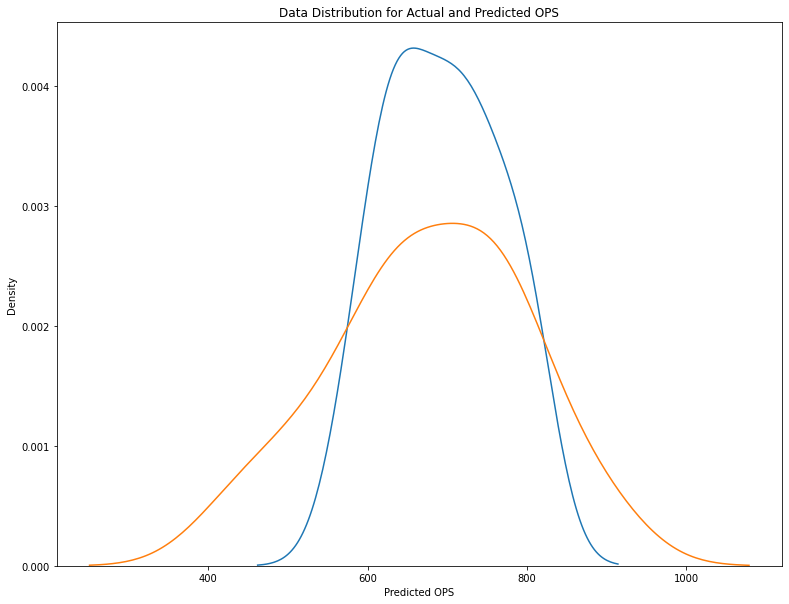

In [342]:
df["Predicted OPS"] = 1
predictions = results.predict()
df['Predicted OPS'] = pd.Series(predictions)

warnings.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(13,10))
plt.title('Data Distribution for Actual and Predicted OPS')
sns.distplot(df['OPS'], hist=False, label="Actual", ax=ax)
sns.distplot(df['Predicted OPS'], hist=False, label="Linear Regression Predictions", ax=ax)

#### It looks like the predictions (orange) expand farther than the actual values (blue) but don’t have as much density. We can observe that the actual values are more dense than the predicted meaning there are more actual OPS values between 600 and 800 than predicted OPS values.

<AxesSubplot:>

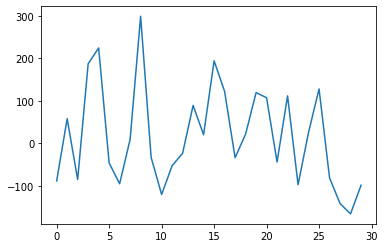

In [343]:
df['Residual'] = df['OPS'] - df['Predicted OPS']
df['Residual'].plot()

#### Accurate models have residual graphs close to 0, but since this is a liner regression there are a few severe outliers but overall the values are hovering around 0.